In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin as pg

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.outliers_influence as sms
from statsmodels.tools.tools import add_constant

In [3]:
from patsy.contrasts import ContrastMatrix
from patsy.contrasts import Poly
%matplotlib inline

In [6]:
data = pd.read_csv('../Data_Files/Teach.dat', sep='\t')
data.head()

,group,exam
0,1,50
1,1,45
2,1,48
3,1,47
4,1,45


In [7]:
m01 = ols('exam~C(group)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   exam   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     21.01
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           3.15e-06
Time:                        13:16:30   Log-Likelihood:                -91.332
No. Observations:                  30   AIC:                             188.7
Df Residuals:                      27   BIC:                             192.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.0000      1.694     29.524      0.000      46.525      53.475
C(group)[T.2]     6.0000      2.395      2.505      0.019       1.086      10.914
C(group)[T.3]    15.4000      2.395      6.430      0.000      10.486      20.314
==============================================================================
Omnibus:                        0.671   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.746
Skew:                           0.218   Prob(JB):                        0.689
Kurtosis:                       2.363   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking various assumptions before doing Anova

In [8]:
data_1 = data[data['group']==1]
data_2 = data[data['group']==2]
data_3 = data[data['group']==3]

In [9]:
stat, p = st.levene(data_1['exam'], data_2['exam'], data_3['exam'])
print(stat, p)

1.734265734265734 0.1956209045688294


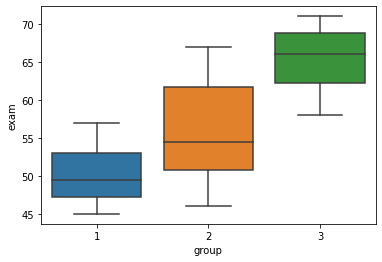

In [10]:
_ = sns.boxplot(x='group', y='exam', data=data)

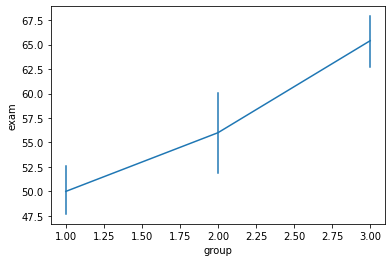

In [11]:
_ = sns.lineplot(x='group', y='exam',data=data, err_style='bars')

In [13]:
anova_table = sm.stats.anova_lm(m01)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,1205.066667,602.533333,21.007748,0.000003
Residual,27.0,774.400000,28.681481,NaN,NaN


In [14]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()
prediction.head()

,predicted,standarized_prediction
0,50.0,-1.106588
1,50.0,-1.106588
2,50.0,-1.106588
3,50.0,-1.106588
4,50.0,-1.106588


In [15]:
summary_frame = sms.OLSInfluence(m01).summary_frame()
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)
summary_frame .head()

,dfb_Intercept,dfb_C(group)[T.2],dfb_C(group)[T.3],cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,predicted,standarized_prediction
0,1.235138e-14,-1.455624e-15,-7.278120e-16,2.897561e-31,-2.797037e-15,0.1,-9.323455e-16,-2.744751e-15,-9.149170e-16,50.0,-1.106588
1,-3.278413e-01,2.318188e-01,2.318188e-01,3.587006e-02,-9.841198e-01,0.1,-3.280399e-01,-9.835240e-01,-3.278413e-01,50.0,-1.106588
2,-1.291342e-01,9.131168e-02,9.131168e-02,5.739210e-03,-3.936479e-01,0.1,-1.312160e-01,-3.874026e-01,-1.291342e-01,50.0,-1.106588
3,-1.944039e-01,1.374643e-01,1.374643e-01,1.291322e-02,-5.904719e-01,0.1,-1.968240e-01,-5.832118e-01,-1.944039e-01,50.0,-1.106588
4,-3.278413e-01,2.318188e-01,2.318188e-01,3.587006e-02,-9.841198e-01,0.1,-3.280399e-01,-9.835240e-01,-3.278413e-01,50.0,-1.106588


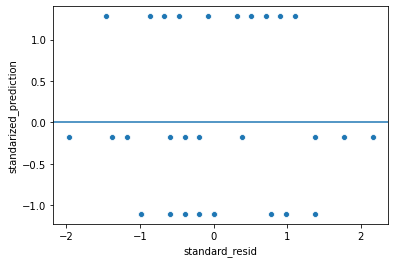

In [16]:
_ = sns.scatterplot(x = 'standard_resid', y='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

In [17]:
st.shapiro(data['exam'])

(0.9368069767951965, 0.07463926076889038)

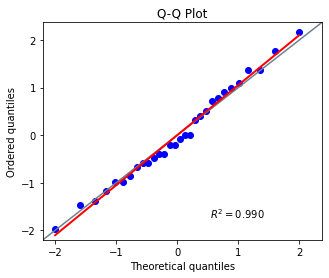

In [18]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)